# Depurar el HTML

## Depurar no debe asustarnos

Cuando escribimos cualquier tipo de código, normalmente todo va bien, hasta ese fatídico momento en el que ocurre un error, hemos hecho algo mal y el código no funciona, o no funciona del todo, no lo suficientemente bien. Los mensajes de error pueden complicarse con facilidad y su interpretación ser menos sencilla a medida que los programas aumentan en tamaño, e incluso casos sencillo pueden llegar a intimidar a alguien. Sin embargo, la depuración no nos debe asustar; la clave para sentirnos cómodos con la escritura y la depuración de cualquier lenguaje o código es la familiaridad, tanto con el lenguaje como con las herramientas.

## HTML y depuración

HTML no es tan complicado de entender, no se compila por separado antes de que el navegador lo analice (se interpreta, no se compila). Y la sintaxis de los elementos de HTML es mucho más sencilla de entender que la de cualquier lenguaje de programación. La forma en que los navegadores ejecutan HTML es más permisiva que la de los otros lenguajes, cosa que es buena y mala a la vez.

### Código permisivo

¿Qué queremos decir con permisivo? Bien, normalmente cuando hacemos algo mal al codificar, suele haber dos tipos de error:

* __Errores sintácticos__: Son errores de escritura en el código que impiden que el programa funcione. Suelen ser fáciles de arreglar si estamos familiarizados con las herramientas adecuadas y sabemos el significado de los mensajes de error.

* __Errores lógicos__: En estos errores la sintaxis es correcta, pero el código no hace lo que debería, por lo que el programa funciona de forma incorrecta. Estos errores son, por lo general, más difíciles de solucionar que los sintácticos, porque no hay mensajes de error que nos avisen de ellos.

HTML en sí mismo no suele producir errores sintácticos porque los navegadores son permisivos con ellos; o sea, el código se sigue ejecutando ¡aun si hay errores! Los navegadores disponen de reglas internas para saber cómo interpretar los errores de marcado incorrecto que encuentran, y seguirán funcionando aunque no produzcan el resultado esperado. Esto puede también ser un problema, por supuesto.

> Nota: La ejecución de HTML es permisiva porque cuando se creó la web por primera vez, se decidió que el hecho de permitir que la gente publicara su contenido era más importante que el hecho de que la sintaxis fuera totalmente correcta. La web no sería tan popular como lo es hoy en día si se hubiera sido más estricto desde el primer momento.

### Validación HTML

El servicio de __validación de etiquetas__ (https://validator.w3.org/); fue creado y está mantenido por el W3C, organización que se encarga de definir las especificaciones de HTML, CSS y otras tecnologías web. Esta página web toma un documento HTML como entrada, lo procesa, y genera un informe de dónde están los errores en el documento.

Documento de ejemplo:

In [1]:
<!DOCTYPE html>
<html lang="en-us">
    <head>
        <meta charset="utf-8">

        <title>HTML debugging examples</title>


    </head>

    <body>
        <h1>HTML debugging examples</h1>

        <p>What causes errors in HTML?

        <ul>
            <li>Unclosed elements: If an element is <strong>not closed properly, then its effect can spread to areas you didn't intend

            <li>Badly nested elements: Nesting elements properly is also very important for code behaving correctly. <strong>strong <em>strong emphasised?</strong> what is this?</em>

            <li>Unclosed attributes: Another common source of HTML problems. Let's look at an example: <a href="https://www.mozilla.org/>link to Mozilla homepage</a>
        </ul>
    </body>
</html>

<!DOCTYPE html>
 
 
 

 HTML debugging examples 


 

 
 HTML debugging examples 

 What causes errors in HTML?

 
 Unclosed elements: If an element is not closed properly, then its effect can spread to areas you didn't intend

 Badly nested elements: Nesting elements properly is also very important for code behaving correctly. strong strong emphasised? what is this? 

 Unclosed attributes: Another common source of HTML problems. Let's look at an example: link to Mozilla homepage

1. Primero, cargamos el servicio de validación en una pestaña del navegador, si no lo tenemos ya.
2. Hacemos clic en la subpestaña __Validate by Direct Input__.
3. Copiamos el código del documento ejemplo (no solo el body) y lo pegamos en el cuadro de texto grande.
4. Hacemos clic en el botón __Check__.

Esto debería proporcionar una lista de errores y otras informaciones:

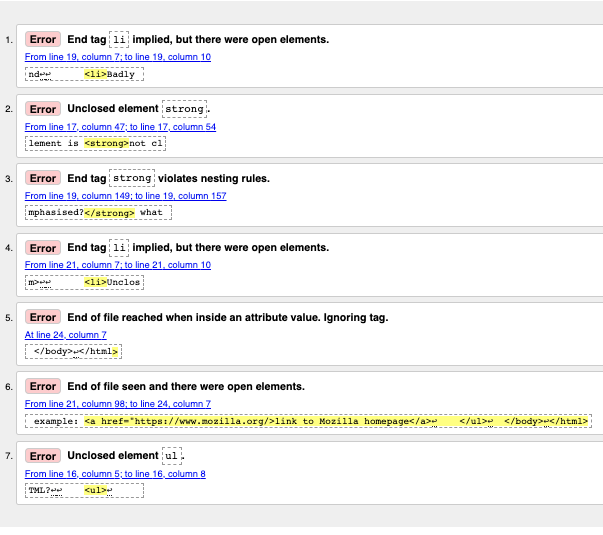

#### Interpretación de los mensajes de error

La lista de mensajes de error que nos presenta el validador suele ayudar, pero a veces, no resultan muy útiles; con un poco de práctica aprenderemos a interpretar la lista para arreglar nuestro código. Observamos que cada mensaje se presenta con un número de línea y de columna, para ayudar a localizar el error más fácilmente.

* "_Consider adding a lang attribute to the html start tag to declare the language of this document_": No se trata de un error, sino de una advertencia (__warning__). La recomendación es definir siempre un idioma, y este "warning" explica cómo hacerlo.

* "_End tag li implied, but there were open elements_" (2 instancias): Estos mensajes indican que un elemento que ha sido abierto debe ser cerrado. La etiqueta de cierre se supone, pero no está ahí. La información de la línea/columna apunta a la primera línea después de donde debería estar la etiqueta de cierre; es una buena pista para ver qué pasa.
* "_Unclosed element strong_": Un elemento `<strong>` no ha sido cerrado, y la línea/columna apunta directamente al lugar del error.
* "_End tag `strong` violates nesting rules_": Este apunta a elementos que están incorrectamente anidados, y la línea/columna nos indica donde están.
* "_End of file reached when inside an attribute value. Ignoring tag_": Esta es bastante enigmática; se refiere al hecho de que el valor de un atributo no ha sido bien construido, posiblemente cerca del final del archivo porque el final aparece dentro del valor del atributo. El hecho de que el navegador no muestre el enlace nos debería dar una buena pista de qué elemento es el erróneo.
* "_End of file seen and there were open elements_": Este es un poco ambiguo, pero básicamente se refiere al hecho de que hay elementos abiertos que necesitan ser cerrados adecuadamente. Los números de línea apuntan a las últimas líneas del archivo, y este mensaje de error viene con una línea de código que indica un ejemplo de un elemento abierto: example: `<a href="https://www.mozilla.org/>link to Mozilla homepage</a> ↩ </ul>↩ </body>↩</html>`.

> Nota: Un atributo al que le falten las comillas de cierre puede ser un elemento abierto, porque el resto del documento será interpretado como si fuera parte de este atributo.

* "`Unclosed element ul`": Este no ayuda mucho, porque el elemento `<ul>` está cerrado correctamente. Este error se debe a que el elemento `<a>` no ha sido cerrado, ya que faltan las comillas de cierre.

No debemos preocuparnos si no podemos corregir todos los mensajes de error; es práctico tratar de arreglar unos pocos errores cada vez y volver a pasar el validador para ver los que quedan. A veces, al arreglar unos cuantos se arreglan automáticamente otros muchos; con frecuencia muchos errores los causa uno solo en un efecto dominó.

Sabremos que todos los errores están arreglados cuando veamos el mensaje siguiente:

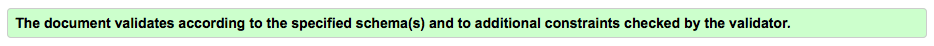